**Case Study: How Does a Bike-Share Navigate Speedy Success
 About the Company**
 
**Background of Analysis**

 In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno, the Marketing Manager, has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

My own task is to answer the first question: **"How do annual memebers and casual riders differ?** Data analysis process is followed to tackle this task.

### The 6 Steps of Data analysis Process (Deliverables)

1.A clear statement of the business task 

2. A description of all data sources used 

3. Documentation of any cleaning or manipulation of data 

4. A summary of your analysis

5. Supporting visualizations and key findings

6. Your top three recommendations based on your analysis
 
## **Ask**
 
 This is where the business task is stated, followed by specific metric-based evaluation quetions to achieve analysis objectives.

 **Business Task:**"How do annual members and casual riders use Cyclistic bikes differently?"
 
 **Evaluation Questions**
 
 1.How many rides did the annual members have compared to casual riders during the year?
 
 2.How many rides based on bike types did the casual riders have comapared to annual members?
 
 3.How did  the casual riders compared to the annual members use the bikes by weekdays and months?
 
 4.What was the average  ride duration  by the users generally?
 
## **PREPARE**
 
The data is publicly available on this link: Index of bucket “[divvy-tripdata](https://divvy-tripdata.s3.amazonaws.com/index.html)” and stored in ZIP files.
The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement). Therefore, I can say that the data is valid for this analysis.

I have downloaded and unzipped the data for 12 months( April 2020 to March 2021). 

Importing the data:



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
apr = pd.read_csv('202004-divvy-tripdata.csv')
may = pd.read_csv('202005-divvy-tripdata.csv')
jun = pd.read_csv('202006-divvy-tripdata.csv')
jul = pd.read_csv('202007-divvy-tripdata.csv')
aug = pd.read_csv('202008-divvy-tripdata.csv')
sep = pd.read_csv('202009-divvy-tripdata.csv')
oct = pd.read_csv('202010-divvy-tripdata.csv')
nov = pd.read_csv('202011-divvy-tripdata.csv')
dec = pd.read_csv('202012-divvy-tripdata.csv')
jan = pd.read_csv('202101-divvy-tripdata.csv')
feb = pd.read_csv('202102-divvy-tripdata.csv')
mar = pd.read_csv('202103-divvy-tripdata.csv')


In [2]:
rides = pd.concat(objs = [apr, may, jun, jul, aug, sep, oct, nov, dec, jan, feb, mar])
rides.head(3)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member


In [3]:
# Getting information about the data
rides.shape

(3489748, 13)

The dataset we have contains 3489748 rows and 13 columns.

## **PROCESS**

This is where data cleaning and manipulation will take place:

* Removing duplicates

* Handling missing values

* Correcting wrong values

* Correcting wrong formating

* Doing data engineering, etc.

I will first of all remove those coulmns not relevant to my objectives.

**Remove irrelevant columns to the objective**

In [4]:
rides.drop(['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis = 1, inplace = True)
# Confirm
rides


,ride_id,rideable_type,started_at,ended_at,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,casual
...,...,...,...,...,...
228491,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,casual
228492,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,member
228493,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,member
228494,F8F43A0B978A7A35,classic_bike,2021-03-01 18:11:57,2021-03-01 18:18:37,member


I now have have 5 columns left.

**Removing dupicates**

There is no duplicates

In [5]:
#Check for duplicates
rides.duplicated().sum()

0

So, no duplicated rows.

**Remove rows with missing values**

In [6]:
# Check for missing values
rides.isnull().sum()
rides.dropna( inplace = True)

There is no row having null.

**Handling wrong values**

In [7]:
# check for wrong values
rides['rideable_type'].unique()

array(['docked_bike', 'electric_bike', 'classic_bike'], dtype=object)

In [8]:
rides['member_casual'].unique()

array(['member', 'casual'], dtype=object)

**Handling formating issues**

In [9]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489748 entries, 0 to 228495
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   ended_at       object
 4   member_casual  object
dtypes: object(5)
memory usage: 159.7+ MB


In [10]:
#'started_at' and 'ended_at' should not be srting but datetime for analysis.
# 'ride_type' and 'member_casual' should be category.

rides['started_at'] = pd.to_datetime(rides['started_at'])
rides['ended_at'] = pd.to_datetime(rides['ended_at'])
rides['rideable_type'] = rides['rideable_type'].astype('category')
rides['member_casual'] = rides['member_casual'].astype('category')

rides.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489748 entries, 0 to 228495
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  category      
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  category      
dtypes: category(2), datetime64[ns](2), object(1)
memory usage: 113.2+ MB


My data now in normal type, and the memory usage has reduced from over 159 mb to about 113 mb.
Moving forward, I want to create some new columns for the analysis

**Data engineering(creating new columns)**

In [11]:
import datetime as dt
rides['ride_duration'] = (rides['ended_at']-rides['started_at'])/pd.Timedelta(minutes=1)
rides['month'] = rides['started_at'].dt.month_name().str[:3]
rides['day'] = rides['started_at'].dt.day_name().str[:3]
rides.head(3)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration,month,day
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,member,26.816667,Apr,Sun
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,member,8.150000,Apr,Fri
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,member,14.383333,Apr,Wed


Note:ride_duration has been coverted to minutes only.


In [12]:
# We need to find out if there is negative duration
rides[rides['ride_duration']<0].count()


ride_id          8364
rideable_type    8364
started_at       8364
ended_at         8364
member_casual    8364
ride_duration    8364
month            8364
day              8364
dtype: int64

There were 8364 rows with negative duration. We have to get rid of them

In [13]:
rides =rides[rides['ride_duration']>0]
rides.head()
# confirm the romoval of rows with negative duration
rides[rides['ride_duration'] <0].count()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
ride_duration    0
month            0
day              0
dtype: int64

In [14]:
rides.to_csv('project1.csv')

## **ANALYZE**

This is where data will be explored to discover patterns and trend, and visualize them.  
Insights are also pointed out here.

**1. Number of Rides by Annual Members and Casual Riders**

In [174]:
# Number of rides by the annual members and the casual rides from April 2020 to March 2021
rides_counts = rides.groupby('member_casual')['ride_id'].count()
rides_counts

member_casual
casual    1424107
member    2048203
Name: ride_id, dtype: int64

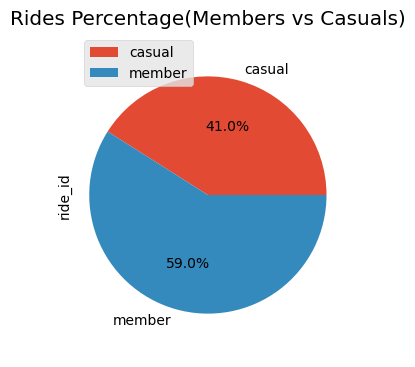

In [175]:
rides_counts.plot(kind='pie', figsize=(3,4), autopct = '%1.1f%%')
plt.title('Rides Percentage(Members vs Casuals)')
plt.axis('equal')
plt.legend(labels=rides_counts.index, loc='upper left')
plt.show()

As seen  from the pie chart above:

Annual members had 2,059,372 rides representing 59% of the total rides during the period. This is normal to show that the annual members maximized their annual subscription.

Casual riders had 1,430,376 rides representing 41% of the total ride for the year.

**2. Bike_type and Usage(Annual Members vs Casual Riders)**

In [176]:

rides_by_biketype = rides.groupby(['member_casual','rideable_type'])['rideable_type'].count()
rides_by_biketype

member_casual  rideable_type
casual         classic_bike       70799
               docked_bike      1112116
               electric_bike     241192
member         classic_bike      249059
               docked_bike      1431442
               electric_bike     367702
Name: rideable_type, dtype: int64

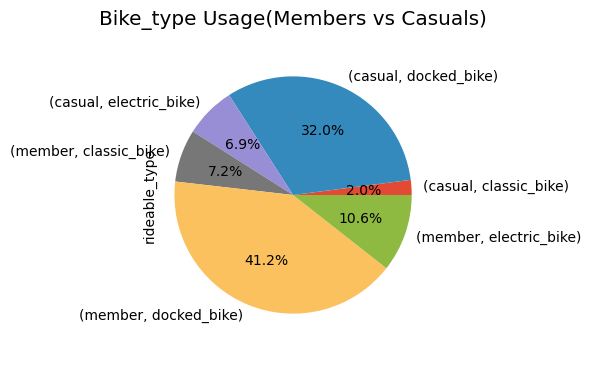

In [150]:
rides_by_biketype.plot(kind='pie', figsize=(3,4), autopct= '%1.1f%%')
plt.title('Bike_type Usage(Members vs Casuals)')
plt.axis('equal')
plt.show()

Looking at the chart, we discovered that docked_bike was mostly used by annual members.

The same pattern was found with the casual riders. It then means docked_bike should be supplied more to riders.

3.**Duration of Rides by Weekdays**

In [15]:
day_count =rides.groupby('day')['ride_duration'].count()
day_count


day
Fri    513994
Mon    417494
Sat    656955
Sun    526583
Thu    465957
Tue    428720
Wed    462607
Name: ride_duration, dtype: int64

<Axes: title={'center': 'Weekdays_Rides'}, xlabel='day', ylabel='day_rides'>

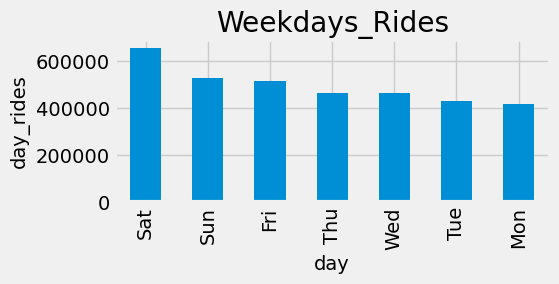

In [23]:
day_count.sort_values(ascending=False).plot(kind='bar', 
                    ylabel='day_rides', title='Weekdays_Rides', figsize=(5,2))

The has shown that bikes were mostly used on Saturday followed by Sunday, and least on Monday. That might suggest that riding was for more of pleasure or exercise than for work.

Could this be the same pattern for both annual members and casual riders? Let's find out.


In [20]:
only_members=rides.loc[rides['member_casual']=='member', 'day']
only_members = only_members.value_counts()
only_members

Sat    322339
Fri    305868
Wed    304606
Thu    299968
Tue    283860
Mon    266844
Sun    264718
Name: day, dtype: int64

<Axes: title={'center': 'Weekday-Rides by Annual Members'}, xlabel='day', ylabel='day_rides'>

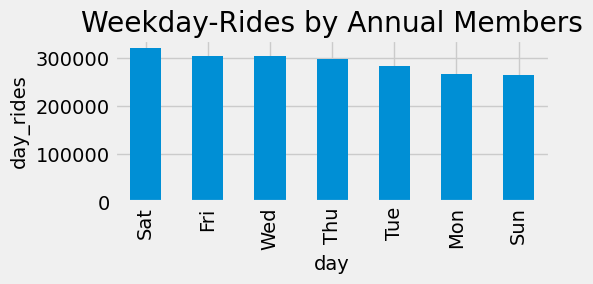

In [22]:
plt.style.use('fivethirtyeight')
only_members.plot(kind='bar',xlabel='day', ylabel='day_rides',
                  title='Weekday-Rides by Annual Members', figsize=(5,2))

Yes! Annual members used bikes mostly on Saturday, and least on Sunday. 
It is also obsered that only little difference occured across the weekdays as
the **range is 57621.**

**Weekda_Rides by Casual Riders**

In [24]:
only_casuals=rides.loc[rides['member_casual']=='casual', 'day']
only_casuals = only_casuals.value_counts()
only_casuals

Sat    334616
Sun    261865
Fri    208126
Thu    165989
Wed    158001
Mon    150650
Tue    144860
Name: day, dtype: int64

<Axes: title={'center': 'Weekday-Rides by Casual Riders'}, xlabel='day', ylabel='day_rides'>

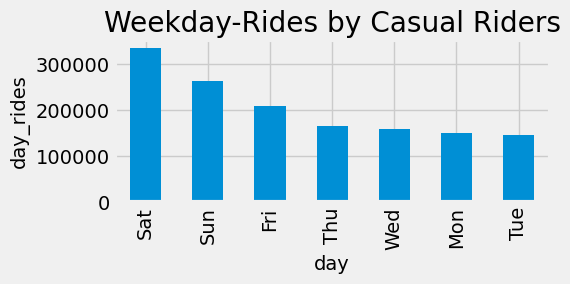

In [25]:
plt.style.use('fivethirtyeight')
only_casuals.plot(kind='bar', xlabel='day', ylabel='day_rides',
                  title='Weekday-Rides by Casual Riders', figsize=(5,2))

Just like annual members, casual riders used bikes mostly on Saturday. Both groups appeard to be weekend riders except the Casual Riders liked to ride more Sundays than the Annal Members did.



**Rides by Months (Members vs casuals)**

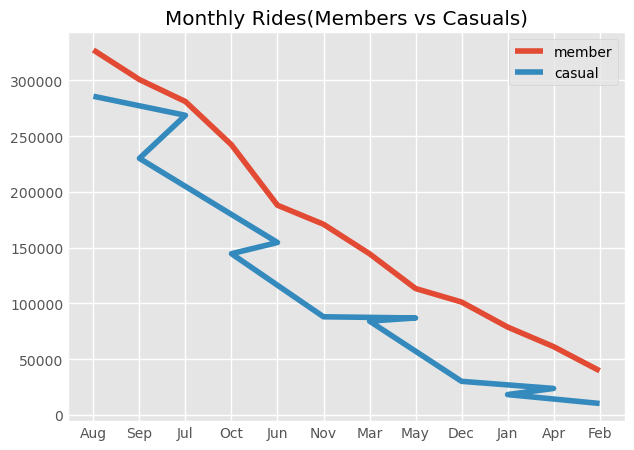

In [236]:

members = rides.loc[rides['member_casual']=='member', 'month'].value_counts().to_frame()
casuals = rides.loc[rides['member_casual']=='casual', 'month'].value_counts().to_frame()
plt.style.use('ggplot')
plt.plot(members)
plt.plot(casuals)
plt.title('Monthly Rides(Members vs Casuals)')
plt.legend(['member','casual'])
plt.show()


The has shown there were more rides during the winter(July to September). The riders preffered other means of transport in the first three months of the year. It could be okay for the company to attract the riders with promo packages during the period.

4.**Average Rides Duration**

In [210]:
rides['ride_duration'].describe().astype('int')

count    3472310
mean          28
std          253
min            0
25%            8
50%           14
75%           26
max        58720
Name: ride_duration, dtype: int32

In [211]:
def cal_per(ride_duration):
    if ride_duration > 28:
        return 'below average'
    elif ride_duration < 28:
        return 'above average'
    else:
        return 'average duration'

In [217]:
rides['ride_duration'].apply(cal_per).value_counts()

above average       2660764
below average        802243
average duration       9303
Name: ride_duration, dtype: int64

<Axes: title={'center': 'Average Duration Classified'}>

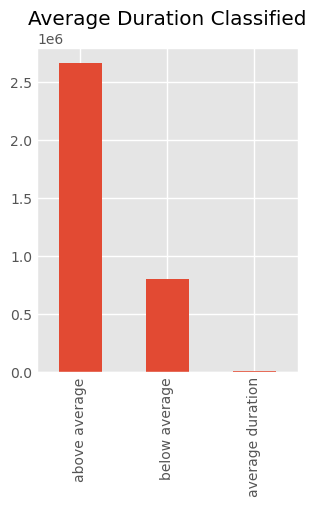

In [220]:
apply = rides['ride_duration'].apply(cal_per).value_counts()
plt.style.use('ggplot')
apply.plot(kind='bar', title='Average Duration Classified', figsize=(3,4))

Approximately, **2.7M** rode bike for more than 28 minutes at a time. Those who rode below average (28 minutes) were **0.8M**, and 28 minute-riders were 9,303. 

### **SHARE**

This is where the insights found from the analysis will be shared with the stakeholders.

### Bike_Share Data Analysis

**Business Task:** How do annual members and casual riders use Cylistic bikes differently?

**Specific Evaluation Quetions for the Analysis:**

1.How many rides did the annual members have compared to casual riders during the year?
 
 2.How many rides based on bike types did the casual riders have comapred to annual members?
 
 3.How did  the casual riders compared to the annual members use the bikes by weekdays and months?
 
 4.What was the average  ride duration  by the users generally?
 

### Data Sources

The data is publicly available on this link: Index of bucket “[divvy-tripdata](https://divvy-tripdata.s3.amazonaws.com/index.html)” and stored in ZIP files.
The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement).



### **Visualizations and Insights**

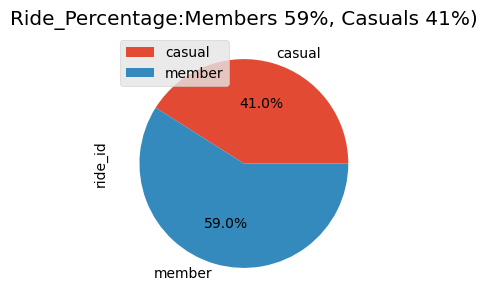

In [238]:
rides_counts.plot(kind='pie', figsize=(3,4), autopct = '%1.1f%%')
plt.title('Ride_Percentage:Members 59%, Casuals 41%)')
plt.legend(labels=rides_counts.index, loc='upper left')
plt.show()

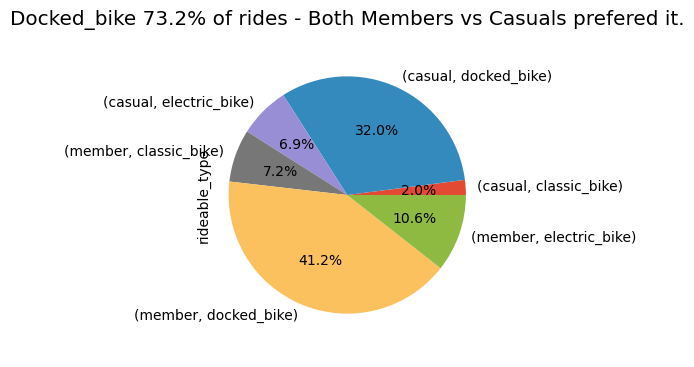

In [242]:
rides_by_biketype.plot(kind='pie', figsize=(3,4), autopct= '%1.1f%%')
plt.title('Docked_bike 73.2% of rides - Both Members vs Casuals prefered it.')
plt.axis('equal')
plt.show()

<Axes: title={'center': 'Weekday-Rides by Annual Members'}, xlabel='day', ylabel='day_rides'>

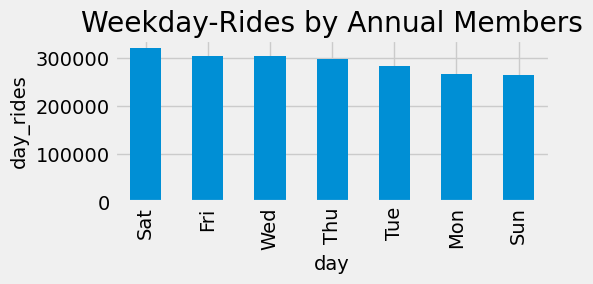

In [28]:
plt.style.use('fivethirtyeight')
only_members.plot(kind='bar',xlabel='day', ylabel='day_rides',
                  title='Weekday-Rides by Annual Members',figsize=(5,2))

Yes! Annual members used bikes mostly on Saturday, and least on Sunday. However, the range was just **57621.**

<Axes: title={'center': 'Casual Riders wrere weekend riders'}, xlabel='day', ylabel='day_rides'>

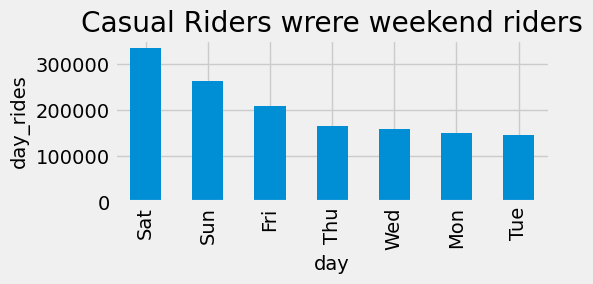

In [27]:
plt.style.use('fivethirtyeight')
only_casuals.plot(kind='bar', xlabel='day', ylabel='day_rides',
                  title='Casual Riders wrere weekend riders', figsize=(5,2))

The range  of the rides was **189756.**

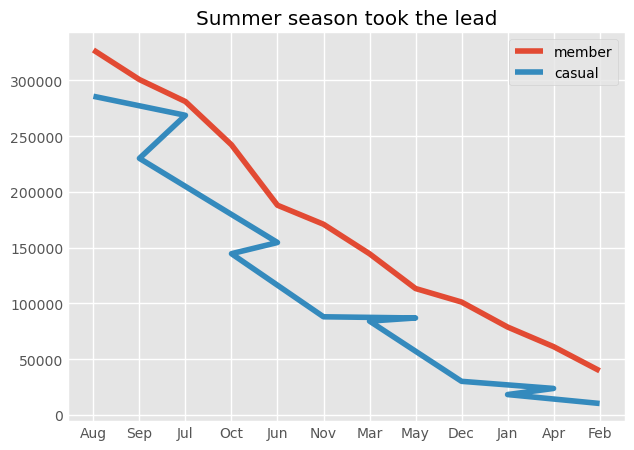

In [252]:
members = rides.loc[rides['member_casual']=='member', 'month'].value_counts().to_frame()
casuals = rides.loc[rides['member_casual']=='casual', 'month'].value_counts().to_frame()
plt.style.use('ggplot')
plt.plot(members)
plt.plot(casuals)
plt.title('Summer season took the lead')
plt.legend(['member','casual'])
plt.show()

There were more rides during summer. This trend could mean that both annual members and casual riders considered their kids in subscriptions, as this period is the summer holiday. 

<Axes: title={'center': 'Average Duration-28  Minutes'}>

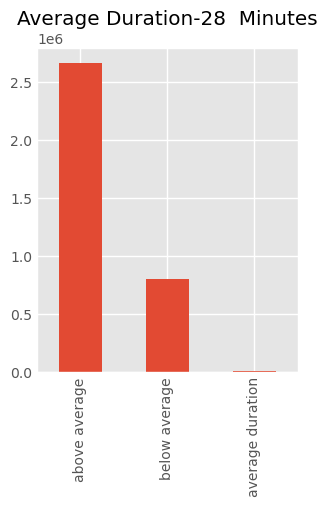

In [254]:
apply = rides['ride_duration'].apply(cal_per).value_counts()
plt.style.use('ggplot')
apply.plot(kind='bar', title='Average Duration-28  Minutes', figsize=(3,4))

### **ACT**

At this point, I will put forward to the stakeholders some actionable recommendations based on my insights from the analysis.

#### **Top 3 Recommendations:**

1.Docked bikes should be more that 73%. This is because at least 73.2% of riders prefered it.

2.Pepare for more maintenance cost if casual riders become converted to annual members. This is because there will be more rides will depreciate the value of the bikes faster.

3.Consider promo package to attract riders from January to April. There are low rides during this period.